In [2]:

import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
# from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=100) # this needs to be modified for some tasks
print('%i regions found in this atlas' % (len(np.unique(nib.load(yeo.maps).get_data().ravel())) 
- 1))
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, 
memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == b'F', dtype=np.int) # gives 1 for females and 0 for males

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)
 ...done. (0 seconds, 0 min)



Dataset created in /root/nilearn_data/schaefer_2018



 ...done. (0 seconds, 0 min)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


100 regions found in this atlas


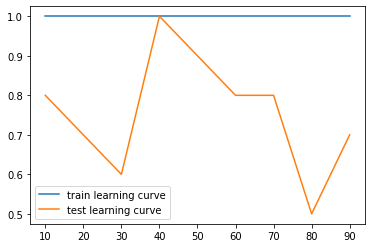

In [3]:
def plot_each_n_rois(i):
  train_input = input_variables[:i]
  train_output = output_variable[:i]

  test_input = input_variables[90:]
  test_output = output_variable[90:]

  Logmodel = LogisticRegression(penalty='l2',C=1.0).fit(train_input, train_output)
  log_predict_train = Logmodel.predict(train_input)
  log_predict_output = Logmodel.predict(test_input)
  test_accuracy = np.sum(log_predict_output == test_output)/len(test_output)
  train_accuracy = np.sum(log_predict_train == train_output)/len(train_output)

  return i, train_accuracy, test_accuracy 

x_list = [] ### n_rois
train_y_list = [] ### accuracy
test_y_list = []

for i in range (10,100,10):
  i, train_accuracy, test_accuracy = plot_each_n_rois(i)

  # print("i: ", i,"accuracy: ", accuracy)
  x_list.append(i)
  train_y_list.append(train_accuracy)
  test_y_list.append(test_accuracy)

# print(x_list)
# print(log_y_list)
# print(KNN_y_list)
plt.xticks(x_list)
plt.plot(x_list,train_y_list,label='train learning curve')
plt.plot(x_list,test_y_list,label='test learning curve')
# plt.plot(x_list,KNN_y_list,label='KNN')

plt.legend()
plt.show()